<a href="https://colab.research.google.com/github/Datalincy/-Car-Data/blob/main/crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [ ]:
# Load dataset (example: contains weather, soil, and yield data)
data = pd.read_csv('/content/yield_df.csv')

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
# display sample data
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
# handling missing values
data.dropna().isnull().sum()


,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
# handling duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
data.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
# Select relevant features
features = ['Temperature', 'Rainfall', 'Soil_pH', 'Nitrogen', 'Phosphorus', 'Potassium']
target = 'yield'

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                               Unnamed: 0      Year  hg/ha_yield  \
Unnamed: 0                       1.000000  0.043850     0.013395   
Year                             0.043850  1.000000     0.091630   
hg/ha_yield                      0.013395  0.091630     1.000000   
average_rain_fall_mm_per_year   -0.228755 -0.003798     0.000962   
pesticides_tonnes               -0.316017  0.140930     0.064085   
avg_temp                        -0.051584  0.014409    -0.114777   

                               average_rain_fall_mm_per_year  \
Unnamed: 0                                         -0.228755   
Year                                               -0.003798   
hg/ha_yield                                         0.000962   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.180984   
avg_temp                                            0.313040   

                               pesticides_tonnes  avg_temp  
Unnamed: 0   

**Data Visualization**

In [ ]:
len(data['Area'].unique())

101

In [ ]:
len(data['Item'].unique())

10

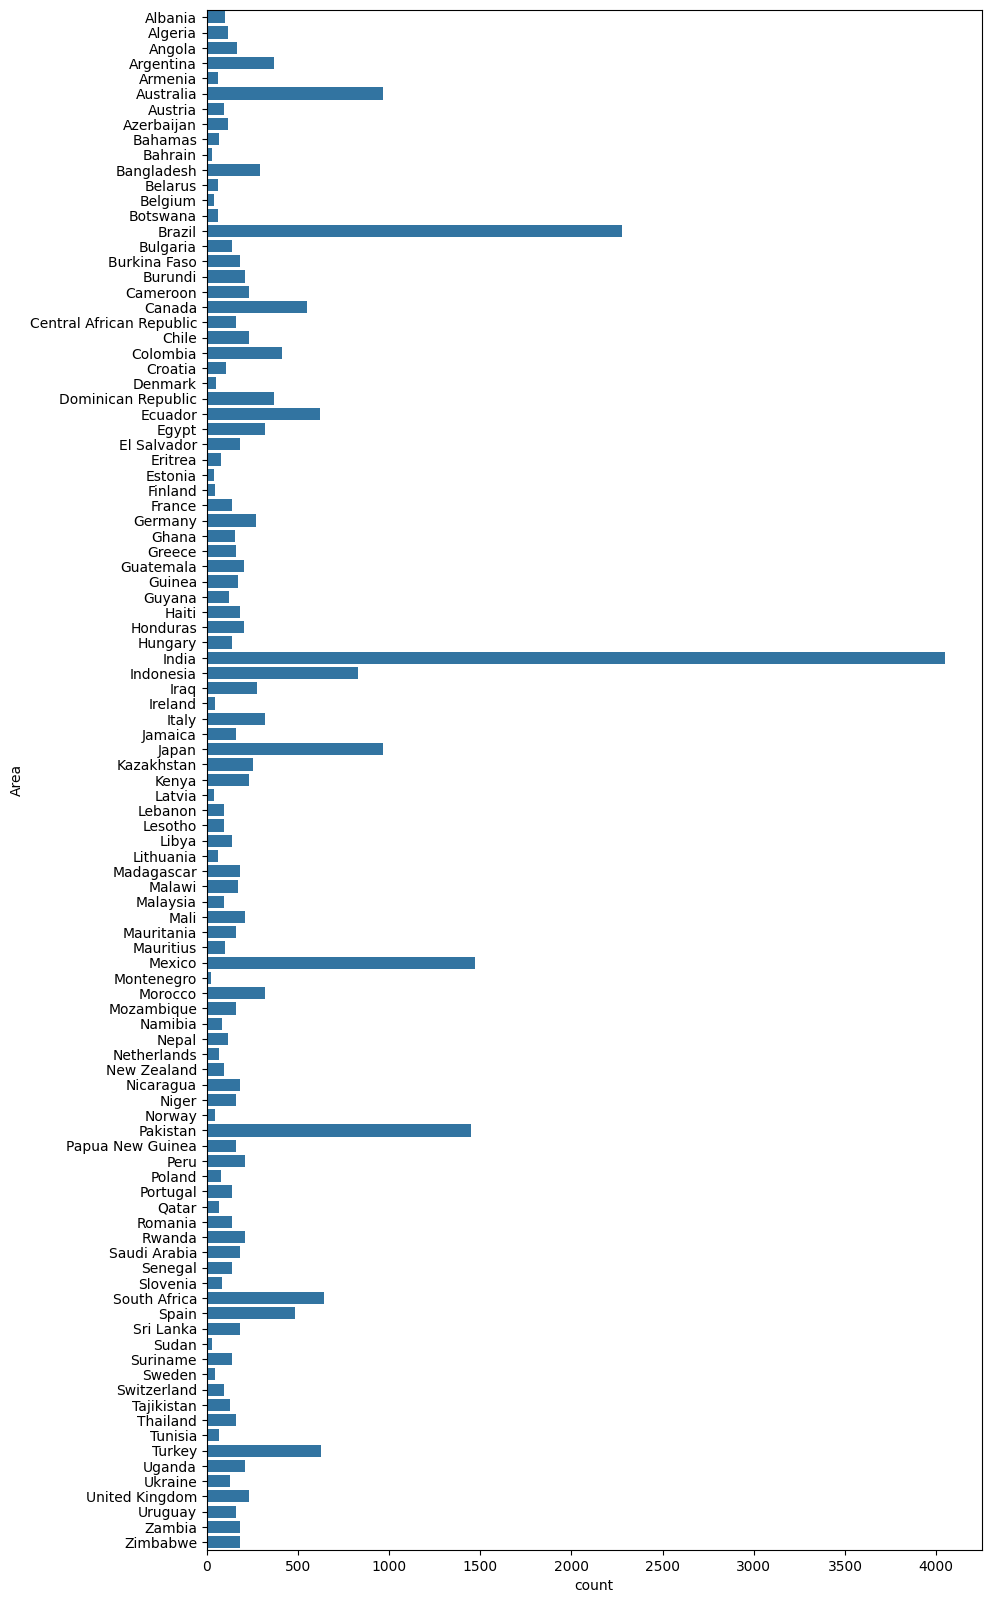

In [ ]:
plt.figure(figsize=(10,20))
sns.countplot(y = data['Area'])
plt.show()

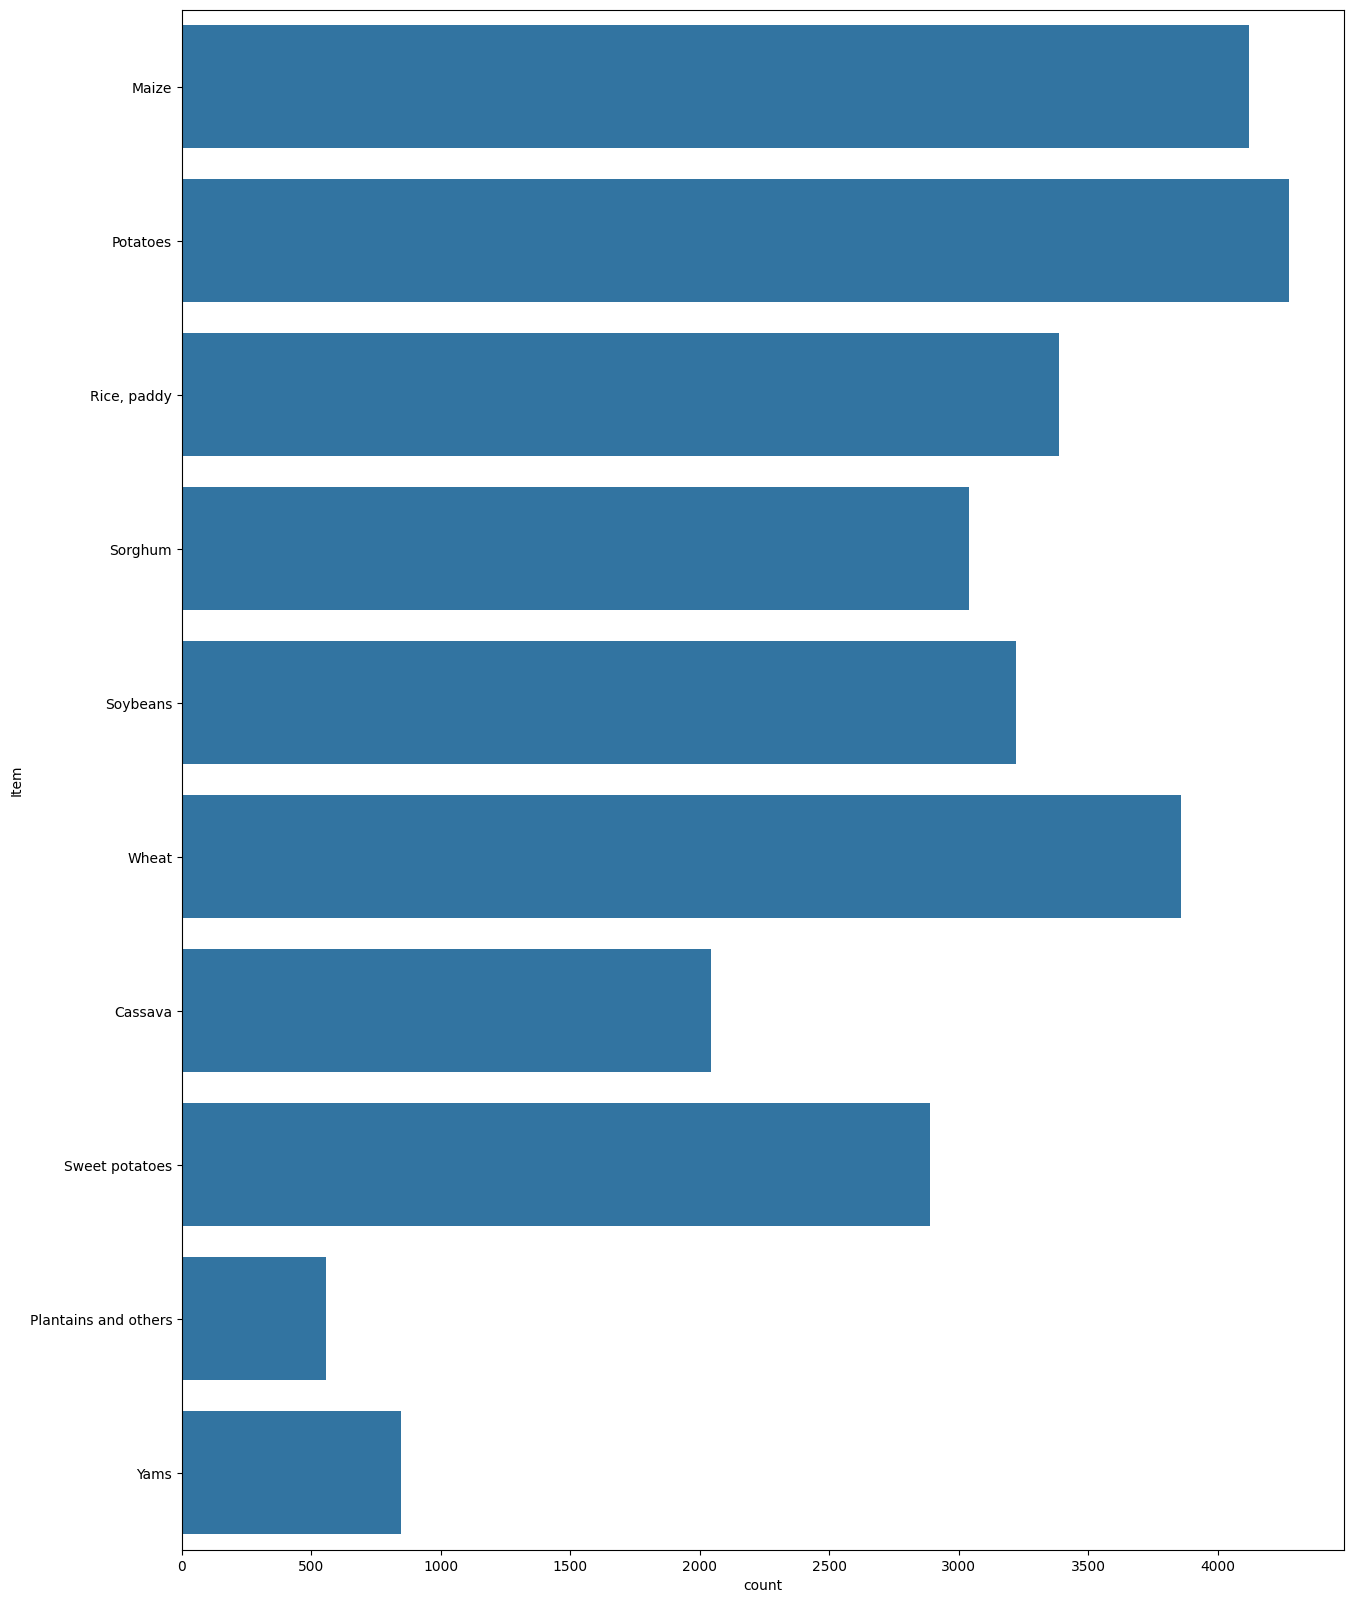

In [ ]:
plt.figure(figsize=(15,20))
sns.countplot(y = data['Item'])
plt.show()

In [ ]:
(data['Area'].value_counts() < 400).sum()

np.int64(88)

In [ ]:
country = data['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(data[data['Area'] == state]['hg/ha_yield'].sum())

In [ ]:
data['hg/ha_yield'].sum()

np.int64(2176140205)

In [ ]:
yield_per_country

[np.int64(5711536),
 np.int64(6711464),
 np.int64(5722563),
 np.int64(32864032),
 np.int64(4524100),
 np.int64(109111062),
 np.int64(10852258),
 np.int64(4608380),
 np.int64(4384717),
 np.int64(4443889),
 np.int64(15440318),
 np.int64(4704812),
 np.int64(8442270),
 np.int64(470651),
 np.int64(167550306),
 np.int64(6263075),
 np.int64(6083337),
 np.int64(7031146),
 np.int64(10717883),
 np.int64(34706922),
 np.int64(4255627),
 np.int64(20561214),
 np.int64(26927138),
 np.int64(6083167),
 np.int64(10701651),
 np.int64(25312166),
 np.int64(21315591),
 np.int64(36828848),
 np.int64(16855944),
 np.int64(1452416),
 np.int64(3595638),
 np.int64(6210668),
 np.int64(15790618),
 np.int64(38780463),
 np.int64(9260371),
 np.int64(14571925),
 np.int64(16508723),
 np.int64(7975743),
 np.int64(8361103),
 np.int64(8619194),
 np.int64(10920131),
 np.int64(8824110),
 np.int64(327420324),
 np.int64(69193506),
 np.int64(10984722),
 np.int64(9104030),
 np.int64(32280700),
 np.int64(19698007),
 np.int64(1244

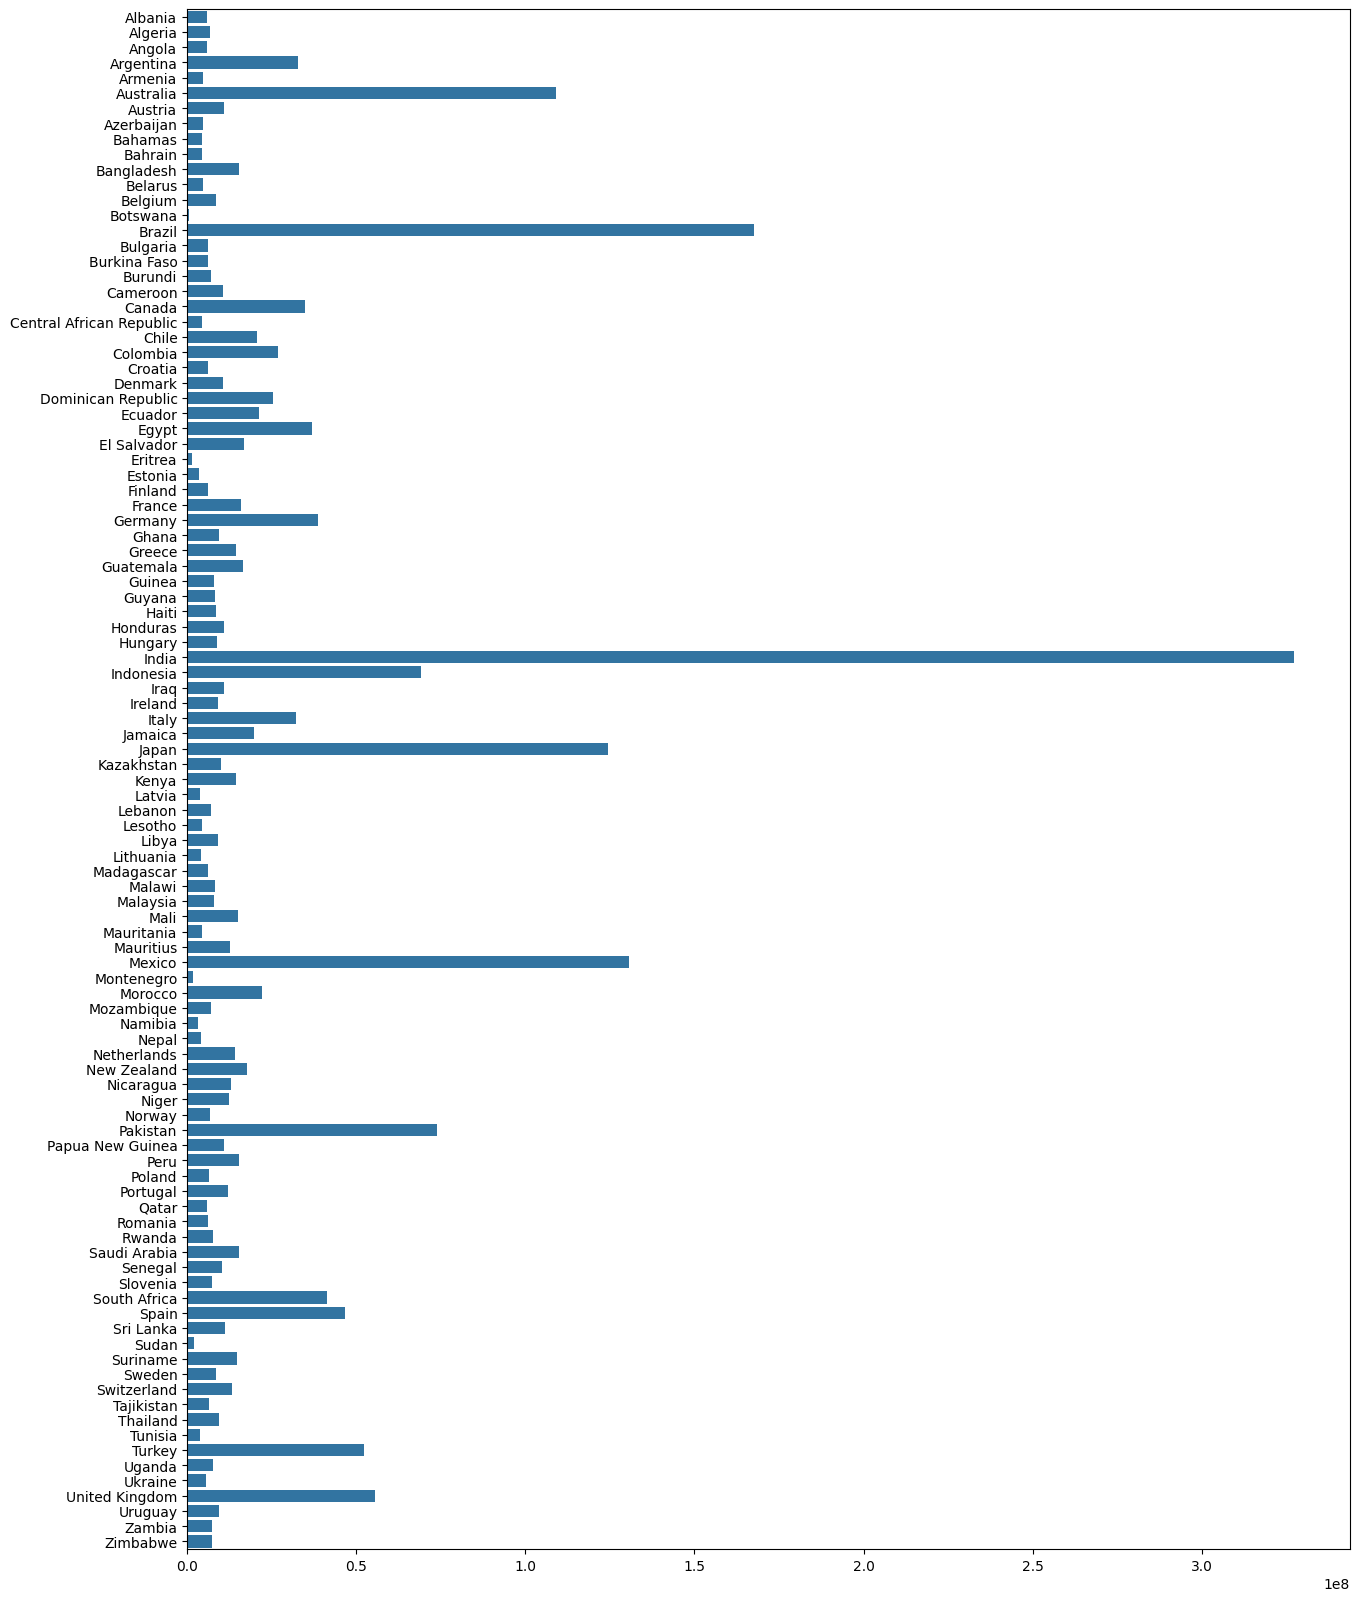

In [ ]:
plt.figure(figsize=(15,20))
sns.barplot(x = yield_per_country, y = country)
plt.show()

In [ ]:
crop = data['Item'].unique()
yield_per_crop = []
for state in crop:
    yield_per_crop.append(data[data['Item'] == state]['hg/ha_yield'].sum())

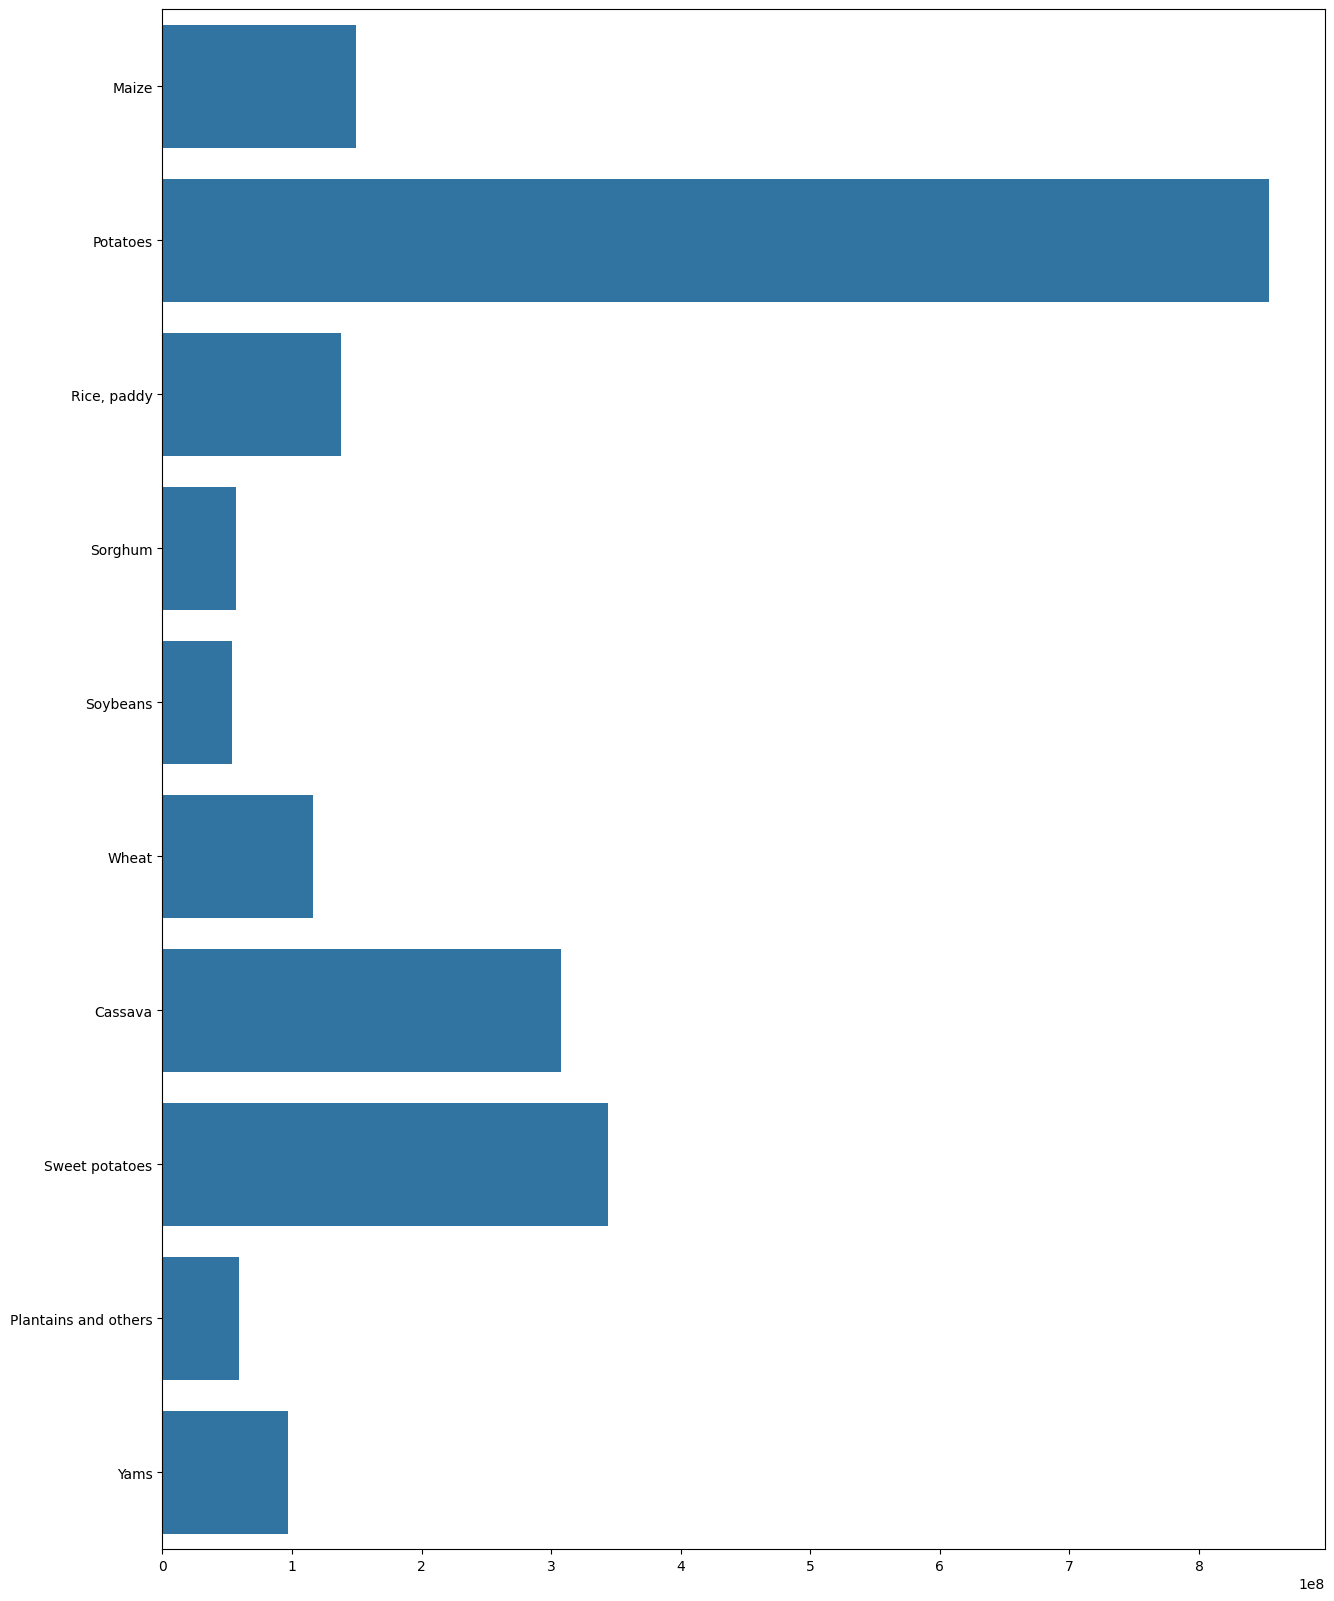

In [ ]:
plt.figure(figsize=(15,20))
sns.barplot(x = yield_per_crop, y = crop)
plt.show()

In [ ]:
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
data.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [ ]:
data = data[col]

In [ ]:
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
X = data.drop('hg/ha_yield', axis = 1)
y = data['hg/ha_yield']

In [ ]:
X.shape

(28242, 7)

In [ ]:
y.shape

(28242,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [ ]:
# Fit the preprocessor on the training data to learn all categories
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_encoded = preprocessor.transform(X_test)

# Now fit the model using the encoded data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_encoded, y_train)  # Use X_train_encoded instead of X_train

# Make predictions using the encoded test data
rf_pred = rf_model.predict(X_test_encoded)  # Use X_test_encoded instead of X_test

# Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-" * 40)

    return mae, mse, rmse, r2

rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")

# Feature importance
rf_feature_importance = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(X.columns), # Get feature names after transformation
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Random Forest Feature Importance:")
print(rf_feature_importance)

Random Forest Evaluation:
MAE: 3295.23
MSE: 78502492.71
RMSE: 8860.16
R2 Score: 0.99
----------------------------------------
Random Forest Feature Importance:
                               Feature  Importance
108        OneHotEncode__Item_Potatoes    0.369020
105         OneHotEncode__Item_Cassava    0.102064
112  OneHotEncode__Item_Sweet potatoes    0.087479
2     StandardScale__pesticides_tonnes    0.061698
46            OneHotEncode__Area_India    0.059280
..                                 ...         ...
97          OneHotEncode__Area_Tunisia    0.000007
8           OneHotEncode__Area_Armenia    0.000006
67       OneHotEncode__Area_Montenegro    0.000005
34          OneHotEncode__Area_Estonia    0.000002
17         OneHotEncode__Area_Botswana    0.000002

[116 rows x 2 columns]


In [ ]:
ohe = OneHotEncoder(drop = 'first', handle_unknown='ignore') # Add handle_unknown='ignore'
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ],
    remainder = 'passthrough'
)

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Add handle_unknown='ignore' , sparse=False for the newer version
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, ['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']),
        ('OneHotEncode', ohe, ['Area','Item'])
    ],
    remainder='passthrough'
)

In [ ]:
# Fit the preprocessor on the entire training data (X_train) to learn all categories
X_train_dummy = preprocessor.fit_transform(X_train)

# Only transform the test data (X_test) using the fitted preprocessor
# This ensures that the same categories are used for both training and testing
X_test_dummy = preprocessor.transform(X_test)

In [ ]:
preprocessor.get_feature_names_out(X_train.columns) # Change 'col[:-1]' to 'X_train.columns'

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Albania', 'OneHotEncode__Area_Algeria',
       'OneHotEncode__Area_Angola', 'OneHotEncode__Area_Argentina',
       'OneHotEncode__Area_Armenia', 'OneHotEncode__Area_Australia',
       'OneHotEncode__Area_Austria', 'OneHotEncode__Area_Azerbaijan',
       'OneHotEncode__Area_Bahamas', 'OneHotEncode__Area_Bahrain',
       'OneHotEncode__Area_Bangladesh', 'OneHotEncode__Area_Belarus',
       'OneHotEncode__Area_Belgium', 'OneHotEncode__Area_Botswana',
       'OneHotEncode__Area_Brazil', 'OneHotEncode__Area_Bulgaria',
       'OneHotEncode__Area_Burkina Faso', 'OneHotEncode__Area_Burundi',
       'OneHotEncode__Area_Cameroon', 'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'On

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")

Linear Regression: mae : 29314.062085570044 score : 0.7596713965136567
Lasso: mae : 29259.34074550597 score : 0.7596914452749252
Decision Tree: mae : 3447.399716764029 score : 0.9827172801344072
KNN: mae : 42288.65533722783 score : 0.41736739567942993


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 33157.,  87717.,  33045., ..., 165000.,  94475.,  72700.])

In [ ]:
data.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    # Create a DataFrame with the input features to ensure correct column order
    # Include 'Unnamed: 0' with a dummy value (or any other value you find suitable)
    features = pd.DataFrame([[0, Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]],
                            columns=['Unnamed: 0', 'Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item'])

    # Apply the preprocessor's transform method
    transform_features = preprocessor.transform(features)

    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [ ]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

In [ ]:
result

np.float64(36613.0)